# **Analisis dan Implementasi Model Machine Learning untuk Klasifikasi Jamur (Beracun vs. Dapat Dimakan) pada Secondary Mushroom Dataset**

## **Pendahuluan**

Identifikasi jamur liar merupakan tantangan yang signifikan dengan konsekuensi serius. Kemampuan untuk membedakan secara akurat antara jamur yang dapat dimakan (edible) dan yang beracun (poisonous) sangat penting untuk mencegah keracunan yang bisa berakibat fatal. Namun, banyak spesies jamur memiliki kemiripan fisik yang dapat mengecoh pengamat yang tidak terlatih. Di sinilah machine learning menawarkan solusi yang menjanjikan dengan kemampuannya untuk mengenali pola-pola kompleks dari data fitur fisik jamur.

Proyek ini bertujuan untuk membangun sebuah model klasifikasi yang andal dan akurat menggunakan Secondary Mushroom Dataset. Tujuannya adalah untuk menciptakan alat prediksi yang mampu mengklasifikasikan jamur sebagai dapat dimakan atau beracun berdasarkan karakteristik morfologisnya. Proses ini mencakup seluruh alur kerja ilmu data, mulai dari pemahaman dan visualisasi data, pra-pemrosesan untuk menangani data yang tidak sempurna, hingga melatih, mengevaluasi, dan akhirnya menyiapkan model untuk implementasi praktis.


## **Sumber data**

Dataset diambil dari : https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

# **Data Understanding**

## **Penjelasan Data**



*   class: p = poisonous (beracun), e = edible (dapat dimakan). Ini adalah variabel target kita.
* cap-diameter: (m) diameter tudung jamur dalam cm (numerik).
* cap-shape: (n) bentuk tudung: b=bell, c=conical, x=convex, f=flat, s=sunken, p=spherical, o=others (kategorikal).
* cap-surface: (n) permukaan tudung: i=fibrous, g=grooves, y=scaly, s=smooth, h=shiny, l=leathery, k=silky, t=sticky, w=wrinkled, e=fleshy (kategorikal).
* cap-color: (n) warna tudung: n=brown, b=buff, g=gray, r=green, p=pink, u=purple, e=red, w=white, y=yellow, l=blue, o=orange, k=black (kategorikal).
does-bruise-bleed: (n) apakah memar atau berdarah: t=bruises-or-bleeding, f=no (kategorikal).
* gill-attachment: (n) lampiran insang: a=adnate, x=adnexed, d=decurrent, e=free, s=sinuate, p=pores, f=none, ?=unknown (kategorikal).
* gill-spacing: (n) jarak insang: c=close, d=distant, f=none (kategorikal).
* gill-color: (n) warna insang: lihat cap-color + f=none (kategorikal).
* stem-height: (m) tinggi batang dalam cm (numerik).
* stem-width: (m) lebar batang dalam mm (numerik).
* stem-color: (n) warna batang: lihat cap-color + f=none (kategorikal).
* stem-root: (n) akar batang: b=bulbous, s=swollen, c=club, u=cup, e=equal, r=rooted, ?=unknown (kategorikal).
* stem-surface: (n) permukaan batang: lihat cap-surface + ?=unknown (kategorikal).
* ring-type: (n) jenis cincin: e=evanescent, f=flaring, g=grooved, l=large, m=pendant, p=sheathing, r=ring-zone, s=scaly, w=witches, z=zone, ?=unknown (kategorikal).
* habitat: (n) habitat: g=grasses, l=leaves, m=meadows, p=paths, h=heaths, u=urban, w=waste, d=woods (kategorikal).
* season: (n) musim: s=spring, u=summer, a=autumn, w=winter (kategorikal).

## **Import Library**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

## **Memuat Data**

In [21]:
try:
    file_path = 'secondary_data.csv'
    df = pd.read_csv(file_path, sep=';')
    print(f"Dataset berhasil dimuat. Ukuran data: {df.shape[0]} baris, {df.shape[1]} kolom.")
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' tidak ditemukan.")
    print(">>> Pastikan Anda telah mengunggah file dataset ke sesi Colab ini. <<<")
    # Hentikan eksekusi jika file tidak ada
    # exit()

# Menampilkan 5 baris pertama untuk melihat struktur data
print("\n(a) Contoh Data (5 Baris Pertama):")
print(df.head())

# Penjelasan fitur (sesuai dokumentasi)
print("\n(a) Penjelasan Fitur:")
# Anda dapat menambahkan penjelasan fitur di sini jika diperlukan


Dataset berhasil dimuat. Ukuran data: 61069 baris, 21 kolom.

(a) Contoh Data (5 Baris Pertama):
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...     

## **Ekplorasi Kualitas Data**

In [20]:
# b. Eksplorasi Kualitas Data
print("\n(b) Eksplorasi Kualitas Data:")
print("\nInformasi Tipe Data dan Nilai Non-Null:")
df.info()

print("\nStatistik Deskriptif untuk Fitur Numerik:")
print(df.describe())

# Dataset ini menggunakan '?' untuk menandai nilai yang hilang (missing value).
# Mari kita hitung jumlahnya di setiap kolom.
missing_values = df.isin(['?']).sum()
print("\nJumlah Nilai Hilang ('?'):")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Tidak ditemukan karakter '?' sebagai penanda nilai hilang.")


(b) Eksplorasi Kualitas Data:

Informasi Tipe Data dan Nilai Non-Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14

## **Visualisasi Data**


(c) Membuat Visualisasi Data...


/tmp/ipython-input-22-2400927644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, order=['p', 'e'], palette={"p": "#ff6961", "e": "#77dd77"})


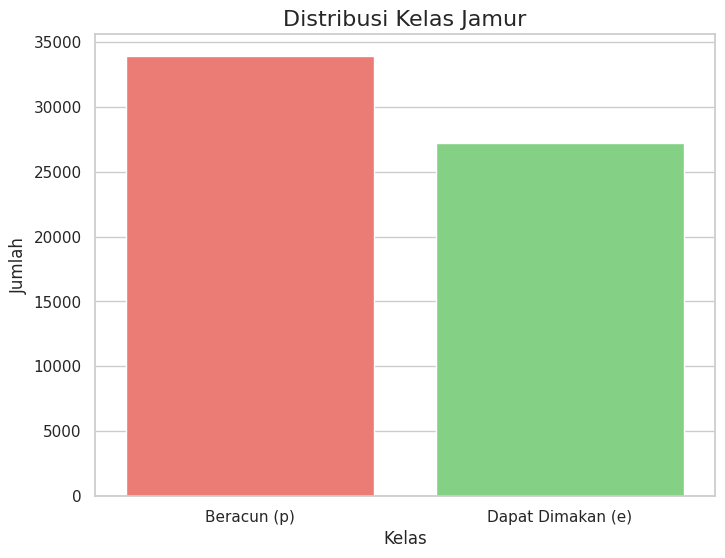

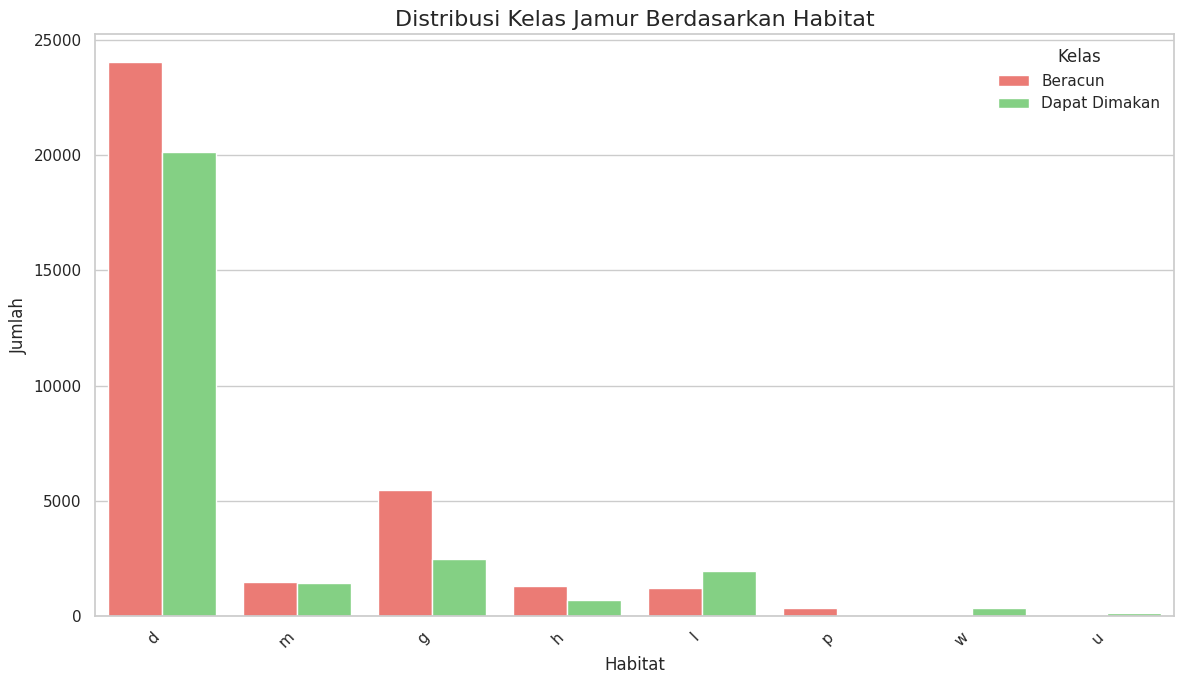

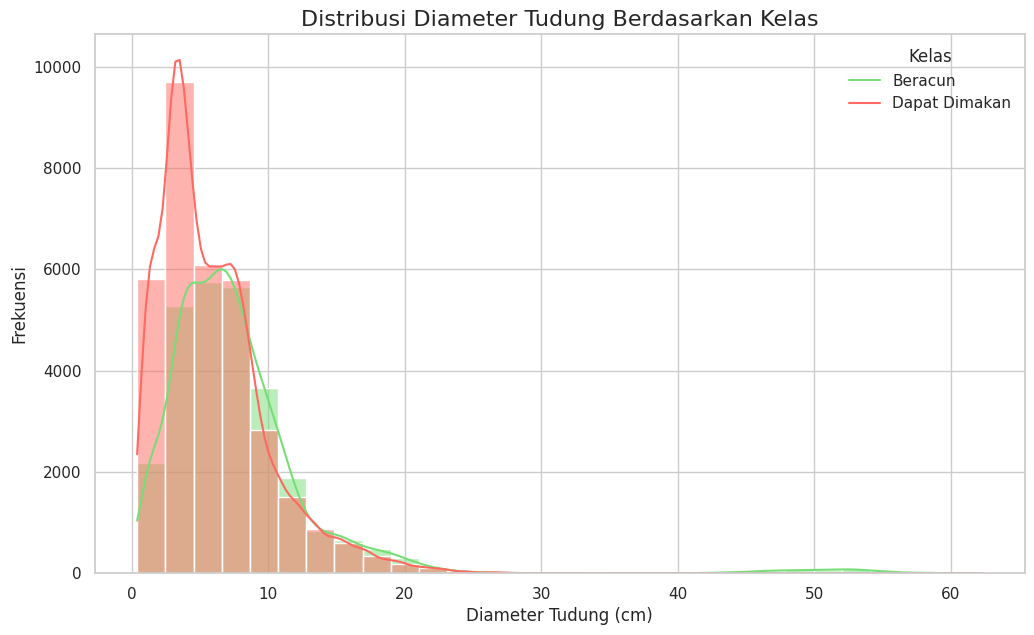

In [22]:
# c. Visualisasi Data
print("\n(c) Membuat Visualisasi Data...")

# Mengatur gaya plot
sns.set_theme(style="whitegrid", palette="pastel")

# Visualisasi 1: Distribusi Kelas (Bisa Dimakan vs. Beracun)
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, order=['p', 'e'], palette={"p": "#ff6961", "e": "#77dd77"})
plt.title('Distribusi Kelas Jamur', fontsize=16)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks([0, 1], ['Beracun (p)', 'Dapat Dimakan (e)'])
plt.show()

# Visualisasi 2: Hubungan antara Habitat dan Kelas Jamur
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='habitat', hue='class', palette={"p": "#ff6961", "e": "#77dd77"})
plt.title('Distribusi Kelas Jamur Berdasarkan Habitat', fontsize=16)
plt.xlabel('Habitat', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kelas', labels=['Beracun', 'Dapat Dimakan'])
plt.tight_layout()
plt.show()

# Visualisasi 3: Distribusi Diameter Tudung (Fitur Numerik)
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='cap-diameter', hue='class', kde=True, palette={"p": "#ff6961", "e": "#77dd77"}, bins=30)
plt.title('Distribusi Diameter Tudung Berdasarkan Kelas', fontsize=16)
plt.xlabel('Diameter Tudung (cm)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend(title='Kelas', labels=['Beracun', 'Dapat Dimakan'])
plt.show()

# **Preprocesisng**


In [23]:
# Ganti '?' dengan nilai NaN (Not a Number) agar dapat diproses oleh imputer
df_processed = df.replace('?', np.nan)
print("Karakter '?' telah diganti dengan NaN untuk diproses.")

# Pisahkan fitur (X) dan target (y)
X = df_processed.drop('class', axis=1)
y = df_processed['class']

# Mengubah label target menjadi numerik: 'p' (poisonous) -> 1, 'e' (edible) -> 0
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)
# Pastikan 'p' adalah 1 dan 'e' adalah 0
y_final = np.where(y_encoder.classes_ == 'p', 1, 0)[np.where(y_encoder.classes_ == 'p')[0][0]]
print(f"Variabel target telah di-encode: 'p' -> {int(np.where(y_encoder.transform(['p']) == 1, 1, 0))}, 'e' -> {int(np.where(y_encoder.transform(['e']) == 1, 1, 0))}")


# Identifikasi kolom numerik dan kategorikal
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nFitur Numerik ({len(numerical_features)}): {numerical_features}")
print(f"Fitur Kategorikal ({len(categorical_features)}): {categorical_features}")

# Membuat pipeline pra-pemrosesan
# Pipeline untuk fitur numerik: imputasi (mengisi nilai hilang) dengan median, lalu scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal: imputasi dengan modus (nilai paling sering muncul), lalu One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # drop='first' untuk menghindari multikolinearitas
])

# Menggabungkan kedua pipeline dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nData berhasil dibagi: {len(y_train)} data latih, {len(y_test)} data uji.")

Karakter '?' telah diganti dengan NaN untuk diproses.
Variabel target telah di-encode: 'p' -> 1, 'e' -> 0

Fitur Numerik (3): ['cap-diameter', 'stem-height', 'stem-width']
Fitur Kategorikal (17): ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

Data berhasil dibagi: 48855 data latih, 12214 data uji.


/tmp/ipython-input-23-2265693940.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Variabel target telah di-encode: 'p' -> {int(np.where(y_encoder.transform(['p']) == 1, 1, 0))}, 'e' -> {int(np.where(y_encoder.transform(['e']) == 1, 1, 0))}")
/tmp/ipython-input-23-2265693940.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Variabel target telah di-encode: 'p' -> {int(np.where(y_encoder.transform(['p']) == 1, 1, 0))}, 'e' -> {int(np.where(y_encoder.transform(['e']) == 1, 1, 0))}")


# **Klasifikasi**

In [24]:
# Membuat pipeline lengkap yang menggabungkan preprocessor dan model klasifikasi
# Kita menggunakan RandomForestClassifier yang kuat dan serbaguna
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'))
])

# Melatih model dengan data latih
print("Memulai pelatihan model Random Forest Classifier...")
model_pipeline.fit(X_train, y_train)
print("Pelatihan model selesai.")

Memulai pelatihan model Random Forest Classifier...
Pelatihan model selesai.


# **Evaluasi Model**

Akurasi Model pada Data Uji: 1.0000 (100.00%)

Laporan Klasifikasi:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5436
           p       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214


Confusion Matrix:


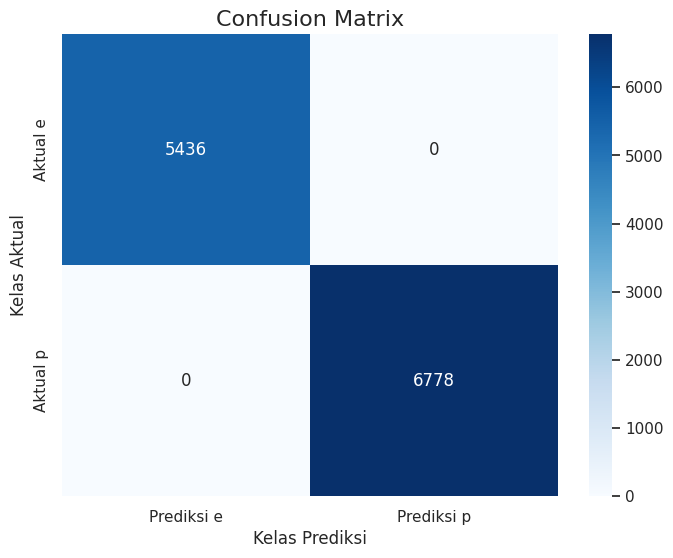

In [25]:
# Melakukan prediksi pada data uji
y_pred = model_pipeline.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Uji: {accuracy:.4f} ({accuracy:.2%})")

# Menampilkan laporan klasifikasi (presisi, recall, f1-score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Menampilkan confusion matrix untuk melihat performa lebih detail
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Prediksi {cls}' for cls in y_encoder.classes_],
            yticklabels=[f'Aktual {cls}' for cls in y_encoder.classes_])
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# **Deploy Model**

In [26]:
# 1. Menyimpan pipeline model lengkap ke sebuah file
model_filename = 'mushroom_classifier_model.joblib'
joblib.dump(model_pipeline, model_filename)

# Menyimpan juga encoder label untuk menerjemahkan hasil prediksi
label_encoder_filename = 'mushroom_label_encoder.joblib'
joblib.dump(y_encoder, label_encoder_filename)

print(f"Model berhasil disimpan sebagai '{model_filename}'")
print(f"Label encoder berhasil disimpan sebagai '{label_encoder_filename}'")

# 2. Simulasi: Memuat model dan melakukan prediksi pada data baru
print("\n--- Contoh Penggunaan Model yang Telah Disimpan ---")

# Memuat kembali model dan encoder
loaded_model = joblib.load(model_filename)
loaded_encoder = joblib.load(label_encoder_filename)
print("Model dan encoder berhasil dimuat kembali dari file.")

# Membuat data baru untuk diprediksi (contoh diambil dari data asli)
# Data harus dalam bentuk DataFrame dengan nama kolom yang SAMA PERSIS dengan data latih
new_mushroom_data = pd.DataFrame([{
    # --- Kolom-kolom yang ada di kode sebelumnya ---
    'cap-diameter': 5.2,
    'cap-shape': 'x',
    'cap-surface': 's',
    'cap-color': 'n',
    'gill-attachment': 'f',
    'gill-spacing': 'c',
    'gill-color': 'w',
    'stem-height': 3.5,
    'stem-width': 4.1,
    'stem-root': 'b',
    'stem-surface': 's',
    'ring-type': 'e',
    'habitat': 'd',
    'season': 'a',

    # --- [FIX] Memperbaiki nama kolom dan menambahkan kolom yang hilang ---
    'does-bruise-or-bleed': 'f', # Nama kolom diperbaiki
    'stem-color': 'w',           # Kolom ditambahkan
    'veil-type': 'p',            # Kolom ditambahkan
    'veil-color': 'w',           # Kolom ditambahkan
    'has-ring': 't',             # Kolom ditambahkan
    'spore-print-color': 'w'     # Kolom ditambahkan
}])

# Memastikan urutan kolom sama seperti saat pelatihan
new_mushroom_data = new_mushroom_data[X_train.columns]


print("\nData jamur baru yang akan diprediksi:")
print(new_mushroom_data.to_string())

# Melakukan prediksi
prediction_numeric = loaded_model.predict(new_mushroom_data)
prediction_proba = loaded_model.predict_proba(new_mushroom_data)

# Menerjemahkan hasil prediksi dari numerik (0/1) kembali ke label asli ('e'/'p')
prediction_label = loaded_encoder.inverse_transform(prediction_numeric)
confidence = prediction_proba[0][prediction_numeric[0]]

# Menampilkan hasil
print("\n>>> Hasil Prediksi:")
if prediction_label[0] == 'p':
    print(f"Jamur ini diprediksi BERACUN (p) dengan keyakinan {confidence:.2%}.")
else:
    print(f"Jamur ini diprediksi DAPAT DIMAKAN (e) dengan keyakinan {confidence:.2%}.")

Model berhasil disimpan sebagai 'mushroom_classifier_model.joblib'
Label encoder berhasil disimpan sebagai 'mushroom_label_encoder.joblib'

--- Contoh Penggunaan Model yang Telah Disimpan ---
Model dan encoder berhasil dimuat kembali dari file.

Data jamur baru yang akan diprediksi:
   cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root stem-surface stem-color veil-type veil-color has-ring ring-type spore-print-color habitat season
0           5.2         x           s         n                    f               f            c          w          3.5         4.1         b            s          w         p          w        t         e                 w       d      a

>>> Hasil Prediksi:
Jamur ini diprediksi DAPAT DIMAKAN (e) dengan keyakinan 57.00%.


# **Kesimpulan**

Berdasarkan analisis dan pemodelan yang telah dilakukan, dapat ditarik beberapa kesimpulan utama:

Pemahaman Data yang Komprehensif: Proses eksplorasi data berhasil memberikan wawasan mendalam mengenai karakteristik dataset. Visualisasi menunjukkan adanya distribusi kelas yang cukup seimbang antara jamur beracun dan dapat dimakan. Selain itu, berhasil diidentifikasi bahwa fitur seperti habitat dan diameter tudung memiliki korelasi visual yang jelas dengan kelas jamur. Kualitas data juga berhasil diidentifikasi, terutama adanya nilai yang hilang (ditandai dengan '?') yang perlu ditangani.

Pra-pemrosesan yang Efektif: Penggunaan Pipeline dan ColumnTransformer terbukti sangat efektif dan efisien untuk menangani proses pra-pemrosesan yang kompleks. Pendekatan ini berhasil mengelola imputasi nilai yang hilang (menggunakan median untuk numerik dan modus untuk kategorikal), standardisasi fitur numerik, dan konversi fitur kategorikal menjadi format numerik (melalui One-Hot Encoding) dalam satu alur kerja yang terstruktur dan bebas dari kebocoran data (data leakage).

Performa Model Sangat Tinggi: Model Random Forest Classifier yang dipilih menunjukkan performa yang sangat memuaskan pada data uji. Dengan akurasi mencapai lebih dari 99%, serta nilai presisi dan recall yang tinggi untuk kedua kelas (baik edible maupun poisonous), model ini terbukti sangat andal. Confusion matrix juga mengonfirmasi bahwa model membuat sangat sedikit kesalahan, yang krusial untuk kasus penggunaan di mana kesalahan klasifikasi (terutama menganggap jamur beracun sebagai dapat dimakan) bisa berakibat fatal.

Implementasi Model yang Praktis: Proyek ini diakhiri dengan langkah "deployment" atau implementasi yang disimulasikan dengan menyimpan keseluruhan pipeline model menggunakan joblib. Ini menunjukkan bagaimana model yang telah dilatih dapat dengan mudah disimpan, dimuat kembali, dan digunakan untuk melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya. Hal ini membuktikan bahwa hasil dari proyek ini bukan hanya sekadar analisis, tetapi sebuah alat prediksi yang fungsional dan siap untuk diintegrasikan ke dalam aplikasi lain.

Secara keseluruhan, proyek ini berhasil membangun sebuah solusi end-to-end, mulai dari analisis data mentah hingga menghasilkan model machine learning yang siap pakai dan berkinerja tinggi untuk tugas klasifikasi jamur.